# Solving ODE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint,RK45
from sympy import symbols,diff

First let's rewrite the question as an initial-value problem.</br>
Let's subtitute $t$ with $u=T-t$,</br>
hence we have $C(t)=C(T-u)=C_0(u)$.</br>
Also, we could calculate that $C'_0(u)=\frac{\partial C(T-u)}{\partial u}=\frac{\partial C(t(u))}{\partial u}=-\frac{\partial C(t)}{\partial t}$.</br>
Besides, We duplicate operations above to the second equation and it turns to</br>
<center>$A(t)=A(T-u)=A_0(u)$</br>
$A_0'(u)=\frac{\partial A(T-u)}{\partial u}=-A'(t)$</center>
In a nutshell, the ODEs become</br>
<center>$C_0'(u)=-bC_0(u)-\frac{1}{2}σ^2C_0(u)^2+1,C_0(0)=0$</br>
$A_0'(u)=aC_0(u),A_0(0)=0$</center>
To calculate this combined equations, we have to use matrix, so I turn it into a matrix form firstly.
<center>$y=\begin{bmatrix}{C_0(u)}\\{A_0(u)}\end{bmatrix}$</center>
Since then, we get
<center>$\frac{\partial y}{\partial u}=\begin{bmatrix}{C_0'(u)}\\{A_0'(u)}\end{bmatrix}$</center>
Finally, we could use methods learned in the course.

## Euler's Method
#### Assumption:
Second derivative exists.(it's used through the computation, but we ignore it in the final form)

In [2]:
'''
"f" is the ODE,
"a" and "b" are the left and right intervals,
"steps" represents the total number of small intervals I would divide the initial one into,
"inivalue" is the value of function at "a", which would be given by the question in an initial-value problem.
'''
def Euler(f,a,b,steps,inivalue):
    y = np.zeros((1,2))  # to restore the value of function
    w = inivalue  # set the initial value
    h = (b-a)/steps  # set the step size
    for i in range(steps):
        t = a+h*(i+1)
        w = w+np.dot(f(t,w),h)  # estimate the value of function at t
        y = np.insert(y,i+1,w,axis=0)
    return y

## Runge-Kutta Method (Second Order Edition)
#### Assumption:
Second partial derivative exists.

In [3]:
'''
"f" is the ODE,
"a" and "b" are the left and right intervals,
"steps" represents the total number of small intervals I would divide the initial one into,
"inivalue" is the value of function at "a", which would be given by the question in an initial-value problem.
'''
def RK(f,a,b,steps,inivalue):
    y = np.zeros((1,2))  # to restore the value of function
    w = inivalue  # set the initial value
    h = (b-a)/steps  # set the step size
    for i in range(steps):
        t = a+h*(i+1)
        w = w+np.dot(h,f(t+h/2,w+np.dot(h/2,f(t,w))))  # estimate the value of function at t
        y = np.insert(y,i+1,w,axis=0)
    return y

Apart the methods, the ODEs in the question should also be defined.</br>

In [4]:
def ODE(u,y,a=0.004,b=0.2,sigma=0.05):
    C,A = y  # C and A are both the functions waiting to be estimated
    dCdu = -b*C-(sigma**2)*(C**2)/2+1
    dAdu = a*C
    dydt = [dCdu,dAdu]  # This is just the matrix of derivatives we've just defined above.
    return dydt

Then we could get two editions of results solved by these two methods.

In [5]:
euler = Euler(ODE,0,1,50,[0,0])  # the estimation of equations through Euler Method
rk = RK(ODE,0,1,50,[0,0])  # the estimation of equations through Runge-Kutta Method (second order edition)

## Taylor's Method (Second Order Edition)
#### Assumption:
Third derivative exists.(it's used through the computation, but we ignore it in the final form)</br>

To use Taylor's Method, we should define a function to help us do partial derivative.
#### *Why put Taylor's Method here:
There's a big problem about Taylor's Method I couldn't solve. When I have to give a value to $w_i$, I need to do following partial derivatives
<center>$...\frac{\partial f(u,C_0(u))}{\partial u}+\frac{\partial f(u,C_0(u))}{\partial C_0}...$</br>
$...\frac{\partial g(u,A_0(u))}{\partial u}+\frac{\partial g(u,A_0(u))}{\partial A_0}...$</br>
while $C'_0(u)=f(u,C_0(u)),A'_0(u)=g(u,A_0(u))$</center>
And I find this <font color=red>couldn't be written as a Jacobian Matrix</font>, hence it's difficult to do partial derivatives in the algorithm.</br>
So compared to other two methods, I couldn't write it into a matrix form.
I think this might be a shortcoming of Taylor's Method.( Or it might be a shortcoming of my ability lol)</br>
Anyway, I could only solve it seperately in an algebraic form, and here is the function.

In [6]:
'''
"f" is the ODE,
"a" and "b" are the left and right intervals,
"steps" represents the total number of small intervals I would divide the initial one into,
"inivalue" is the value of function at "a", which would be given by the question in an initial-value problem.
'''
def Taylor(f,a,b,steps,inivalue):
    y = []  # to restore the value of function
    w = inivalue  # set the initial value
    y.append(w)
    h = (b-a)/steps  # set the step size
    
    tp,yp = symbols('tp,yp')  # symbolize "tp" and "yp", to enable compute the partial derivatives through Sympy.
    f_tp = diff(f(tp,yp),tp)  # compute the partial derivatives on variable "t"
    f_yp = diff(f(tp,yp),yp)  # compute the partial derivatives on variable "y"
    
    for i in range(steps):
        t = a+h*(i+1)
        value_f_tp = float(f_tp.subs({tp:t,yp:w}))  # compute the exact value of partial derivatives on variable "t" at t
        value_f_yp = float(f_yp.subs({tp:t,yp:w}))  # compute the exact value of partial derivatives on variable "y" at t
        w = w+f(t,w)*h+(h**2)*(value_f_tp+value_f_yp*f(t,w))/2  # estimate the value of function at t
        y.append(w)
    return y

Because the function we define above is in algebraic form rather then matrix form, it couldn't solve combined equations.</br>
Since then we have to solve them separately, we start with the first equation.

In [7]:
# the first equation
def ODE_C(u,c,b=0.2,sigma=0.05):
    part1 = b*c
    part2 = (sigma**2)*(c**2)/2
    return -part1-part2+1

Then we could get three edition of $C_0(u)$ solved by three methods.

In [8]:
C_taylor = Taylor(ODE_C,0,1,50,0)  # the estimation of C0(u) through Taylor's Method (second order edition)

Then we tried to solve the second equation based on the equation we get above.</br>
In the step $w_i=w_{i-1}+f(u_{i-1},w_{i-1})h+\frac{h^2}{2}[f_u(t_{i-1},w_{i-1})+f_A(u_{i-1},w_{i-1})f(u_{i-1},w_{i-1})]$,
we have</br>
<center>$f(u_{i-1},w_{i-1})=aC_0(u_{i-1})$</br>
$f_u(u_{i-1},w_{i-1})=\frac{\partial aC_0(u_{i-1})}{\partial u_{i-1}}=
\frac{\partial aC_0(u_{i-1})}{\partial C_0(u_{i-1})}\frac{\partial C_0(u_{i-1})}{\partial u_{i-1}}=
aC_0'(u_{i-1})$</br>
$f_A(u_{i-1},w_{i-1})=\frac{\partial aC_0(u_{i-1})}{\partial A_0(u_{i-1})}=0$</center>
We have the following form of Taylor's Method.

In [9]:
A = 0  # the initial value of A_0(u) given by the question
a = 0.004  # the value of paramter "a" given by the question
h = 1/50 # the step size given by the question
A_taylor = []  # to restore the value of function
A_taylor.append(A)
for i in range(int(1/h)):
    u = h*(i+1)
    A = A+(a*C_taylor[i])*h+(h**2)*(a*ODE_C(u,C_taylor[i]))/2  # estimate the value of function at u_i
    A_taylor.append(A)

Let's integrate the results we get separately into a whole one.

In [10]:
taylor = np.array((C_taylor,A_taylor)).T

## Verification
While ode45() is a solver in MATLAB and based on Dormand–Prince method (an adaptive Runge–Kutta method), Python has its own function solver called odeint().</br>


In [42]:
y0 = [0,0]  # set the initial value
u = np.linspace(0,1,51)  # set the step size and the interval
answer = odeint(ODE,y0,u,tfirst=True)  # The equation has already been defined as "ODE()" above, here we call it directly.

Then we should transform the value that we get through three methods and odeint() to match the original question.( In other words, we have to turn the order upside down.)

In [43]:
euler0 = np.flip(euler,axis=0).T
taylor0 = np.flip(taylor,axis=0).T
rk0 = np.flip(rk,axis=0).T
answer0 = np.flip(answer,axis=0).T
result = [euler0,taylor0,rk0,answer0]  # put them into a list in order to call them later

Then we visualize the result to see whether they're close to each other.

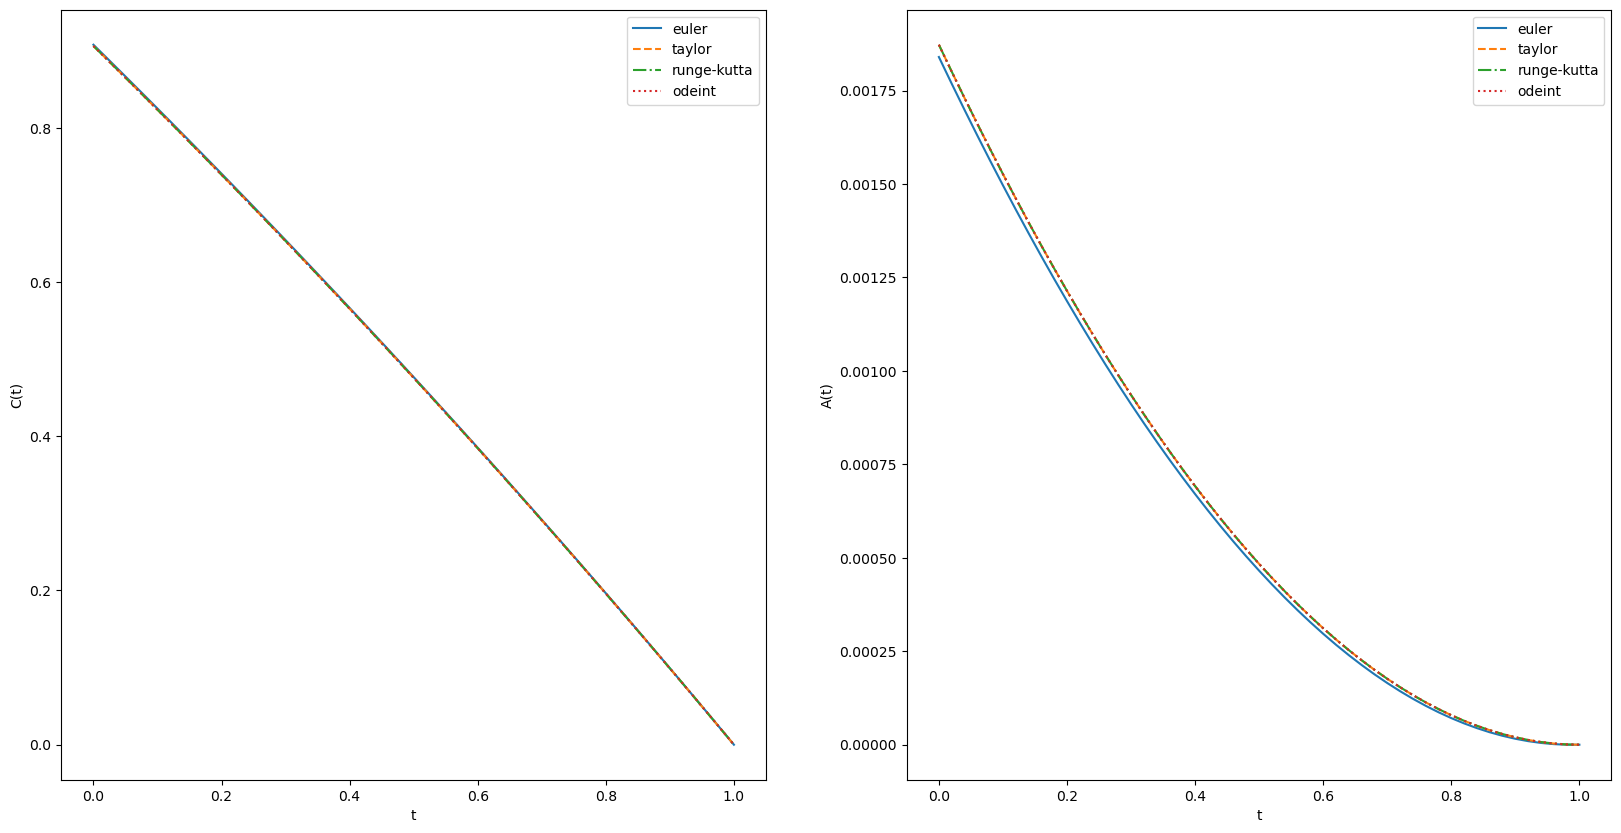

In [44]:
fig,ax = plt.subplots(1,2,figsize=(20,10))

# define some paramters we would use or change in the plot
x = np.linspace(0,1,51)
labels = ['euler','taylor','runge-kutta','odeint']
line = ['-','--','-.',':']
yaxis = ['C(t)','A(t)']

# draw the plot
for i in range(2):
    for j in range(4):
        ax[i].plot(x,result[j][i],
                  label=labels[j],
                  linestyle=line[j])
    ax[i].set_xlabel('t')
    ax[i].set_ylabel(yaxis[i])
    ax[i].legend(loc='upper right')
plt.show()

We could see that Euler's Method has tiny difference compared to others in $A(t)$.</br>
Apart from that, the results from these methods are just about the same.